# Data Exploration for Machine Learning Education Projects:

 * ## Image Captioning Problem

### *Disclaimer:*
* #### *Hardware:*
* ###### CPU: Intel Core i5-7300HQ
* ###### RAM: 16 GB
* ###### GPU: Nvidia GTX 1050 | 2GB
* #### *Keras Backend: Tensorflow 2.1 GPU*
* #### *On this kernel, all models are already trained and loaded; however, Training specs are displayed for evidence purposes and metric visualization.* 

## Image Captioning Problem 

### Data Collection

#### The next cell creates a .py file which will automatically download the datasets for this project. 
#### On terminal, inside the appropriate enviornment, run: (It will take between 30 min to two hours, depending on your internet speed and your bandwidth usage)
#### ```python coco_data_collection.py``` or ```python3 coco_data_collection.py```, which ever works for you.

#### The Data is provided by the Common Objects in Context ([COCO](https://cocodataset.org/#home)) Project; therefore, we have to follow [COCO's Terms of Use](https://cocodataset.org/#termsofuse) and [Flickr's Terms of Use](https://www.flickr.com/creativecommons/) 

In [1]:
import os 
folder = 'scripts/'
if not os.path.isdir(folder):
    os.makedirs(folder)

In [2]:
%%writefile scripts/coco_data_collection.py
import wget
import os
import zipfile
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


def downloadAndUnzip(url, zipFile, folder):
    print(f'working on {zipFile}')
    if not os.path.isfile(zipFile):
        wget.download(url, zipFile) # download .zip file from url source
    if not os.path.isdir(zipFile.replace('.zip','')):
        with zipfile.ZipFile(zipFile, 'r') as zip_: # unzip in a given folder
            for member in tqdm(zip_.infolist(), desc='Extracting'):
                try:
                    zip_.extract(member, folder)
                except zipfile.error as e:
                    pass
    print(f'zip file {zipFile} has been downloaded and extracted in {folder}')

if __name__ == '__main__':
    # create data folder if inexistent
    folder = 'data/'
    if not os.path.isdir(folder):
        os.makedirs(folder)
        
    urls = ['http://images.cocodataset.org/zips/train2014.zip',
            'http://images.cocodataset.org/zips/val2014.zip',
            'http://images.cocodataset.org/annotations/annotations_trainval2014.zip'] 

    zipFiles = ['data/train2014.zip',
                'data/val2014.zip',
                'data/annotations_trainval2014.zip']
    
    for url, zipFile in zip(urls, zipFiles):
        downloadAndUnzip(url, zipFile, folder)
        

Overwriting scripts/coco_data_collection.py


In [3]:
# run in terminal
# !python scripts/coco_data_collection.py

### Data Exploration: Summary
#### Image files: ``` data/train2014/*``` and ```data/val2014/*```
#### JSON files: ``` data/annotations/captions_train2014.json``` and ```data/annotations/captions_val2014.json```

#### Train2014 has 82,783 images and Val2014 has 40,504.

#### So, in order to understand the hierarchical structure within each JSON file, we have to explore the keys which encode the dictionaries.  

#### the main dictionary has five keys: 'info', 'images', 'licenses', 'categories', 'annotations'. The most important ones for this project are 'images' and 'annotations'. 

#### At least, numerically, both JSON's are consistent with the image folders. Later, it's ascertained that the images are named congruently with the databases. 

### Training Data Summary

- #### 82,783 images;
- #### each one with either five (82586), six (196) or seven (1) captions.
- #### there are 414,113 captions.
- #### Originally, there are no letters with special symbols (ticks, primes, diaresis) (English Language)
- #### A homologated corpus to lower cases and deleting punctuation marks gives 23,130 unique words.
- #### La longest Caption has 49 words, the shortest has 5 words and, on average, captions are 10.45 words long. Hence a positively skewed (right skewed) distribution is in place. 
- #### Regarding image sizes, the lowest height and width are 51 and 59 pixels respectively; however, maximum height and width are 640 pixels, each. The average width is 578 pixels and the average height is 438.6 pixels. Anyhow, both metrics have quasi-bimodal distributions with peaks aproximately around 500 and 640 pixels, each.

## Validation Data Summary

- #### 40,504 images;
- #### each one with either five (40373), six (128) or seven (3) captions.
- #### there are 202,654 captions.
- #### Originally, there are no letters with special symbols (ticks, primes, diaresis) (English Language)
- #### A homologated corpus to lower cases and deleting punctuation marks gives 17,350 unique words.
- #### The longest Caption has 50 words, the shortest has 6 words and, on average, captions are 10.45 words long. Hence a positively skewed (right skewed) distribution is in place. 
- #### Regarding image sizes, the lowest height and width are 111 and 120 pixels respectively; however, maximum height and width are 640 pixels, each. The average width is 576.5 pixels and the average height is 485 pixels. Anyhow, both metrics have quasi-bimodal distributions with peaks aproximately around 470 and 640 pixels, each.

## All previous conclusions were attained and pondered by running the following three cells. The third one will display a python-formatted report, delving more into each part of this exploration.

In [4]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import re

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [5]:
from IPython.core.interactiveshell import InteractiveShell # All outputs are displayed for every cell
InteractiveShell.ast_node_interactivity = "none"


 The folder data/annotations has 6 files.
	 With file extesions: {'.json'}

 The folder data/models has 20 files.
	 With file extesions: {'.h5'}

 The folder data/train2014 has 82783 files.
	 With file extesions: {'.jpg'}

 The folder data/val2014 has 40504 files.
	 With file extesions: {'.jpg'}

 For data/annotations/captions_train2014.json file

	images key has 82783 records, 
	 each with dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']) attributes

	annotations key has 414113 records, 
	 each with dict_keys(['image_id', 'id', 'caption']) attributes

 For data/annotations/captions_val2014.json file

	images key has 40504 records, 
	 each with dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id']) attributes

	annotations key has 202654 records, 
	 each with dict_keys(['image_id', 'id', 'caption']) attributes

 For data/annotations/instances_train2014.json file

	images key has 8278

  0%|          | 0/414113 [00:00<?, ?it/s]

Training
Unique Words: 23130
Max Number of Words in a Caption: 49
Min Number of Words in a Caption: 5
Average Number of Words in all captions: 10.458350740015407


  0%|          | 0/202654 [00:00<?, ?it/s]

Validation
Unique Words: 17350
Max Number of Words in a Caption: 50
Min Number of Words in a Caption: 6
Average Number of Words in all captions: 10.452623683717075


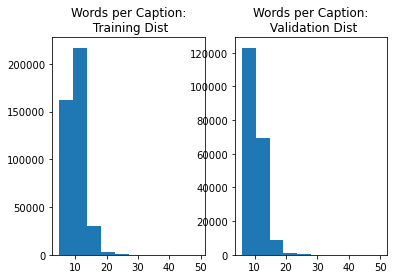


 Training 
             license        height         width             id
count  82783.000000  82783.000000  82783.000000   82783.000000
mean       2.818054    483.590206    578.045794  290998.758900
std        1.511456     96.855347     92.020402  167952.307935
min        1.000000     51.000000     59.000000       9.000000
25%        1.000000    426.000000    500.000000  144726.000000
50%        3.000000    480.000000    640.000000  291797.000000
75%        4.000000    512.000000    640.000000  435936.500000
max        7.000000    640.000000    640.000000  581921.000000

 Validation 
             license        height         width             id
count  40504.000000  40504.000000  40504.000000   40504.000000
mean       2.826536    485.069944    576.541477  290741.634086
std        1.494372     97.766584     91.872464  168164.031110
min        1.000000    111.000000    120.000000      42.000000
25%        1.000000    426.000000    500.000000  145585.000000
50%        3.000000    480.

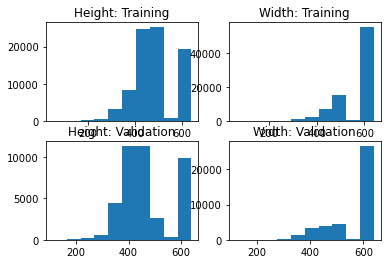

Are the training images and annotations sets congruent? True
Are the validation images and annotations sets congruent? True


In [6]:
# Explore folders within data/
data = 'data/' 
folders = [''.join([data, folder]) for folder in os.listdir(data) if os.path.isdir(''.join([data, folder]))]
for folder in folders:
    files = os.listdir(folder)
    print(f"\n The folder {folder} has {len(files)} files.")
    print(f"\t With file extesions: {set([os.path.splitext(file)[1] for file in files])}")

# Explore JSONs within annotations/
annotations = ''.join([data, 'annotations/'])
jsons = [''.join([annotations, js]) for js in os.listdir(annotations) if '.json' in js]

for js in jsons:
    with open(js, 'r') as rf:
        d = json.load(rf)
        
    print(f'\n For {js} file')
    ks = ['images', 'annotations']
    [print(f'\n\t{k} key has {len(d[k])} records, \n\t each with {d[k][0].keys()} attributes') for k in ks]
    
# Assign JSONs for further ETL:
with open('data/annotations/captions_train2014.json', 'r') as rf:
    tr_data = json.load(rf)
    
with open('data/annotations/captions_val2014.json', 'r') as rf:
    v_data = json.load(rf)
    
# Harness Pandas for each dataset
tr_caps = pd.DataFrame(tr_data['annotations'])
v_caps = pd.DataFrame(v_data['annotations'])

tr_imgs = pd.DataFrame(tr_data['images'])
v_imgs = pd.DataFrame(v_data['images'])        

# Assess number of captions per image
print('\nAbout Training')
captions = pd.DataFrame(tr_caps['image_id'].value_counts())['image_id'].value_counts()
[print(f'\t{captions[i]} images have {i} captions') for i in captions.index]

print('\nAbout Validation')
captions = pd.DataFrame(v_caps['image_id'].value_counts())['image_id'].value_counts()
[print(f'\t{captions[i]} images have {i} captions') for i in captions.index]

# Exploreing Captions
titles = [ 'Training', 'Validation']
for i, caps in enumerate([tr_caps, v_caps]):
    capExt = []# list to store all captions extensions: how many words p/ caption
    corpus = ''# string to store every word in every caption
    lc = caps['caption']
    
    for cap in tqdm(lc):
        capExt.append(len(cap.split()))
        corpus += ' ' + cap.lower() + ' '# convert to lowercase to decrease data latency
        
    corpus = re.split(r'\W+', corpus)# remove punctuation marks
    corpus = Counter(corpus)
    
    print(titles[i])
    print(f'Unique Words: {len(corpus)}')
    print(f'Max Number of Words in a Caption: {max(capExt)}')
    print(f'Min Number of Words in a Caption: {min(capExt)}')
    print(f'Average Number of Words in all captions: {np.mean(np.array(capExt))}')
    plt.subplot(1, 2, i+1);
    plt.hist(np.array(capExt));
    plt.title(f'Words per Caption:\n {titles[i]} Dist')
plt.show();
    
    
#Images descriptive statistics and distributions
for i, imgs in enumerate([tr_imgs, v_imgs]):
    print('\n {} \n'.format(titles[i]), imgs.describe())
    
    plt.subplot(2,2, 2*i+1);
    plt.hist(imgs['height']);
    plt.title(f'Height: {titles[i]}');
    plt.subplot(2,2, 2*i+2);
    plt.hist(imgs['width']);
    plt.title(f'Width: {titles[i]}');
plt.show();

# ascertain file names are congruent with the databases. 

imgsTr = tr_imgs['file_name'].to_list()
imgsV = v_imgs['file_name'].to_list()

imgs_v = os.listdir('data/val2014/')
imgs_tr = os.listdir('data/train2014/')

print(f'Are the training images and annotations sets congruent? {set(imgsTr) == set(imgs_tr)}')
print(f'Are the validation images and annotations sets congruent? {set(imgsV) == set(imgs_v)}')

del imgsTr, imgsV, imgs_v, imgs_tr

In [7]:
from IPython.core.interactiveshell import InteractiveShell # All outputs are displayed for every cell
InteractiveShell.ast_node_interactivity = "all"


## Data transformation by dint of our preliminary model: Google's Inception V.3™

### Training and Validation dictionaries structure: ``` {image_id: list(captions)} ```

### Seize this process to transform captions into lowercase, erase punctuation marks and spaces on every string's ends.  

### We find out that training and validation vocabulary has 4,189 words that are NOT shared. Going through a deeper processing, we can ameliorate this discrepancy. For instance, taking some percentage of the vocabulary with higher incidency or changing every word to its morphological root. Here, we'll get rid of all the words that appear only once on the Machine Learning Kernel. 



In [8]:
# create dictionaries and preprocess captions

tr_captions, v_captions = dict(), dict()

for dic, caps in zip([tr_captions, v_captions], [tr_caps, v_caps]):
    ids_ = caps['image_id']
    for id_ in tqdm(ids_):
        lc = caps.loc[caps['image_id'] == id_, 'caption'].to_list()
        id_ = str(id_)
        while len(id_) < 12:
            id_ = '0'+id_
        dic[id_] = [' '.join(re.split(r'\W+', c.lower())).strip() for c in lc]

len(tr_captions)
len(v_captions)

  0%|          | 0/414113 [00:00<?, ?it/s]

  0%|          | 0/202654 [00:00<?, ?it/s]

82783

40504

In [9]:
InteractiveShell.ast_node_interactivity = "last"# all o none

In [10]:
# Assess if vocabulary ovelaps between Training and Validation data

voc_tr, voc_v = set(), set()

for dic, voc in zip([tr_captions, v_captions],[voc_tr, voc_v]):
    for k in dic.keys():
        [voc.update(cap.split()) for cap in dic[k]]

print('Tr: ', len(voc_tr), 'Val: ', len(voc_v))


n_voc = list(voc_v - voc_tr)
        
print('Number of Words Not Shared Among Training and Validation Datasets:', len(n_voc))
voc = voc_tr.union(voc_v)
print('Total words:', len(voc))

Tr:  23129 Val:  17349
Number of Words Not Shared Among Training and Validation Datasets: 4189
Total words: 27318


In [11]:
# Write Caption Files for ML

lines = list()
for k, caps in tr_captions.items():
    [lines.append(k + ' ' + cap) for cap in caps]
    
con = '\n'.join(lines)
with open('data/tr_captions.txt', 'w') as file:
    file.write(con)

lines = list()
for k, caps in v_captions.items():
    [lines.append(k + ' ' + cap) for cap in caps]
    
con = '\n'.join(lines)
with open('data/v_captions.txt', 'w') as file:
    file.write(con)

13261316

### The model's performance will be determined by several factor. One with which you can play is the size of the corpus. There are words that only appear once; therefore, it's reasonable to neglect them for these examples will overfit in spirit of unlikely occurences. Next I share a provisional code for corpus reduction based on a percentage you'd like to keep. 
```python
# provisional code for vocabulary reduction according to an outlier theshold percentage(outlier_th)
voc_tr, voc_v = '', ''

for k, caps in tr_captions.items():
    voc_tr += ' ' + ' '.join(caps) + ' '

for k, caps in v_captions.items():
    voc_v += ' ' + ' '.join(caps)

voc_tr, voc_v = Counter(voc_tr.split()).most_common(), Counter(voc_v.split()).most_common()

outlier_th = .99

t_tr, t_v = 0, 0
for _, c in voc_tr:
    t_tr += c

for _, c in voc_v:
    t_v += c

bag_por = 0
n_W = 0
new_voc_tr, new_voc_v = [], []

for w,c in voc_tr:
    if bag_por <= outlier_th:
        n_W += c
        bag_por = n_W/t_tr
        new_voc_tr.append(w)
    else:
        break
        
bag_por = 0
n_W = 0

for w,c in voc_v:
    if bag_por <= outlier_th:
        n_W += c
        bag_por = n_W/t_v
        new_voc_v.append(w)
    else:
        break
        
print('New Tr: ', len(new_voc_tr), 'New Val: ', len(new_voc_v))


new_n_voc = list(set(new_voc_v) - set(new_voc_tr))
        
print('Number of Words Not Shared Among Training and Validation New Datasets:', len(new_n_voc))
new_voc = set(new_voc_tr).union(set(new_voc_v))
print('New Total words:', len(new_voc))

```

### The following processes concern the facts that this is meant to be run locally, the datasets are relatively massive and we want to use the Google's imagenet model, Inception V3. 

### The model will be explained in the Machine Learning kernel, however, some key features for this part are the following:

* #### for the input, pictures should have 299 x 299 pixels
* #### we'll get rid of the last layer so that we can connect it to the NLP layers

### The datasets will be serialized using a GPU, but this can be done as well with a CPU. Serializing the datasets will make them more portable, easy to feed to the learning stage and less sensitive to data loss. 

### Both training and validation sets will be posited in Pickle files as feature vectors 

### Run the script in terminal so that you can keep using the notebook: 
### ```python scripts/datasets_to_pickles.py```

In [12]:
%%writefile scripts/datasets_to_pickles.py
from PIL import Image
import pickle
import os
from tqdm import tqdm_notebook as tqdm
import numpy as np
from numba import cuda
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
physical_devices = tf.config.list_physical_devices('GPU') 
tf.test.is_built_with_cuda()
print(f'Using GPU: {tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)}')

# Create a new model, by removing the last layer (output layer) from the inception v3
model = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet')
model_new = keras.Model(model.input, model.layers[-2].output)

def preprocess(image_path):
    # Convert all the images to size 299x299 as expected by the inception v3 model
    img = keras.preprocessing.image.load_img(image_path, target_size=(299, 299))
    # Convert PIL image to numpy array of 3-dimensions
    x = keras.preprocessing.image.img_to_array(img)
    # Add one more dimension
    x = np.expand_dims(x, axis=0)
    # preprocess the images using preprocess_input() from inception module
    x = keras.applications.inception_v3.preprocess_input(x)
    return x

# Function to encode a given image into a vector of size (2048, )
def encode(image):
    image = preprocess(image) # preprocess the image
    fea_vec = model_new.predict(image) # Get the encoding vector for the image
    fea_vec = np.reshape(fea_vec, fea_vec.shape[1]) # reshape from (1, 2048) to (2048, )
    return fea_vec

if __name__ == '__main__':
    data = "data/"
    pickles = ["encoded_train_images.pkl", "encoded_test_images.pkl", "encoded_final_images.pkl"]
    folders = ["train2014/", "val2014/", 'test_images/']
    for folder, pick in zip(folders, pickles):
        print(f'working on a pickle about {folder}')
        if folder == 'test_images/':
                pick = ''.join([folder, pick])
        else: 
            folder = ''.join([data, folder])
            pick = ''.join([data, pick])
        if not os.path.isfile(pick):
            dataset = [''.join([folder, file]) for file in os.listdir(folder)]

            encoding = {}
            for img in tqdm(dataset):
                encoding[img.replace(folder,'')] = encode(img)

            # Save the bottleneck train features to disk
            with open(pick, "wb") as encoded_pickle:
                pickle.dump(encoding, encoded_pickle)
            
        print(f'{folder} has been serialized inside {pick}')
        dataset_features = pickle.load(open(pick, "rb"))
        print(f'Photos {folder}: {len(dataset_features)}')
        
        # clear GPU memory if needed
#         del dataset_features
#         device = cuda.get_current_device()
#         device.reset()
#         physical_devices = tf.config.list_physical_devices('GPU') 
#         tf.test.is_built_with_cuda()
#         print(f'Using GPU: {tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)}')
        
        

Overwriting scripts/datasets_to_pickles.py


In [13]:
# run in terminal
# !python scripts/datasets_to_pickles.py